In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.font_manager as fm

from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

In [ ]:
x_line='단맛'
y_line='선물'

In [ ]:
name_list =["감홍로 40도","금설 35도","꿀샘 16도","더한 매실원주 13도","도원결의 15도","박재서 명인 안동 소주 45도",
            "안동소주 일품 40도","서울의밤 25도","토끼소주 화이트","오미자 리큐르 16도", '바다한잔 동해소주']

position_list=['단맛','순함','독함','부드러움','탄산','선물','향']

word_list=['단|달','순하|순해','독해','부드|깔끔','톡','선물','은은|향긋|과일향|누룩', '탄산', '색|탁도', '끝맛', '가성비', '산미', '걸쭉']

x_index = position_list.index(x_line)
y_index = position_list.index(y_line)

x_text = word_list[x_index]
y_text = word_list[y_index]

In [ ]:
x_list = []
y_list = []
for name in name_list:
    data = pd.read_csv(f"{name}.csv", encoding='utf-8-sig')
    data.drop_duplicates(['text'],ignore_index=True, inplace=True) # 중복 제거
    data.dropna(inplace=True)
    # globals()[f"{name}"]
    x_list.append(len(data[data.text.str.contains(x_text)])/len(data))
    y_list.append(len(data[data.text.str.contains(y_text)])/len(data))
x_list.append(0)
y_list.append(0)

In [ ]:
x = np.array(x_list).reshape(-1,1)
y = np.array(y_list).reshape(-1,1)

In [ ]:
scaled_x = scaler1.fit_transform(x)
scaled_y = scaler1.fit_transform(y)

In [ ]:
target_list = ["감홍로 40도","꿀샘 16도","더한 매실원주 13도","도원결의 15도","박재서 명인 안동 소주 45도",
            "안동소주 일품 40도"]

In [ ]:
plt.rcParams['axes.unicode_minus'] = False

font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()

plt.rc('font', family=font_name) 
plt.rcParams["figure.figsize"] = (8, 8)


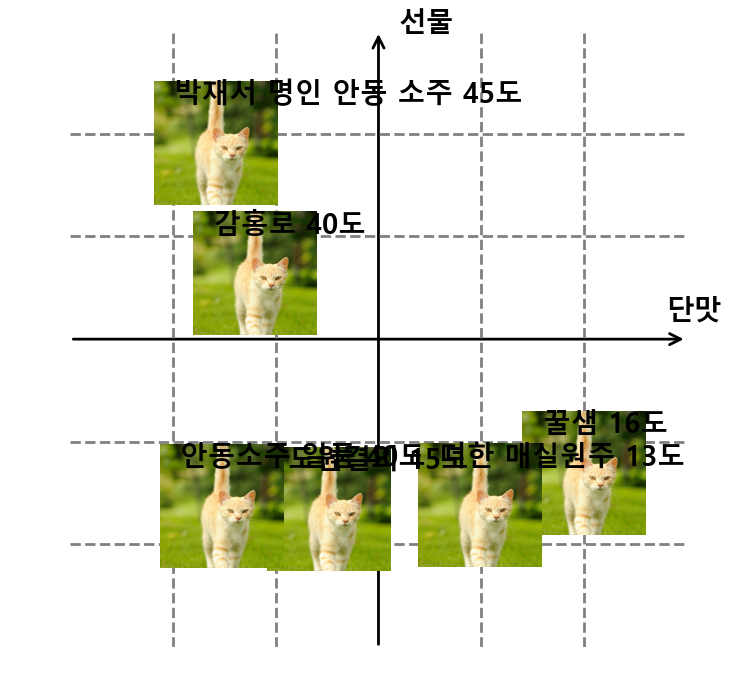

In [ ]:
font = {'family' : font_name,
        'weight' : 'bold',
        'size'   : 20}

plt.plot()
plt.rc('font', **font)
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.text(1.2,0.55, position_list[x_index])
plt.text(0.55,1.25, position_list[y_index])
plt.annotate('',
             ha = 'center', va = 'bottom',
             xytext = (-0.25, 0.5),
             xy = (1.25, 0.5),
             zorder=0,
             arrowprops = {'edgecolor':'black', 
              'arrowstyle':'->',
              'lw' : 2
              })

plt.annotate('',
             ha = 'center', va = 'bottom',
             xytext = (0.5, -0.25),
             xy = (0.5, 1.25),
             zorder=0,
             arrowprops = {'edgecolor':'black', 
              'arrowstyle':'->',
              'lw' : 2
              })
plt.xticks([0,0.25,0.75,1], alpha=0)
plt.yticks([0,0.25,0.75,1], alpha=0)
plt.tick_params(axis='both', length=0)

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False)
plt.grid(True, color='gray', alpha=1, linestyle='--', lw=2,zorder=0)

for target in target_list:
    target_index = name_list.index(target)
    target_x = scaled_x[target_index]
    target_y = scaled_y[target_index]
    plt.scatter(target_x,target_y)
    img = mpimg.imread("C:/temf/1.jpg")
    plt.imshow(img,extent=[target_x[0]-0.15, target_x[0]+0.15, target_y[0]-0.15, target_y[0]+0.15],zorder=2)
    plt.text(target_x-0.1, target_y+0.1, name_list[target_index])
    



